In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#Importe o arquivo formato xlsx
imovel = pd.read_excel("imoveis.xlsx")
imovel.head()

,area,preco
0,359.87,25000
1,353.12,45000
2,341.89,45000
3,435.99,20000
4,341.77,25000


In [4]:
imovel.describe()

,area,preco
count,54.000000,54.000000
mean,457.483519,41296.296296
std,261.527053,16488.566227
min,293.220000,20000.000000
25%,355.087500,30000.000000
50%,380.360000,40000.000000
75%,470.087500,50000.000000
max,2057.570000,120000.000000


In [5]:
imovel.corr()

,area,preco
area,1.000000,0.511373
preco,0.511373,1.000000


In [12]:
imovel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    54 non-null     float64
 1   preco   54 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 992.0 bytes


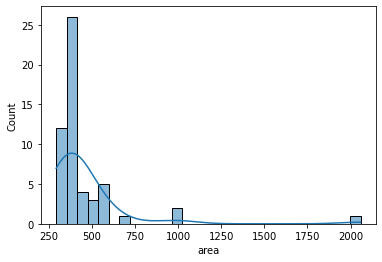

In [16]:
sns.histplot(data=imovel, x="area", kde=True)

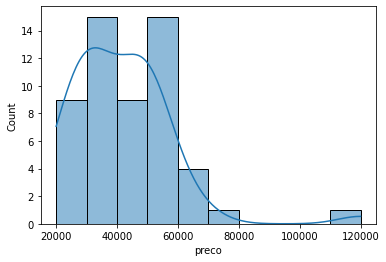

In [17]:
sns.histplot(data=imovel, x="preco", kde=True)

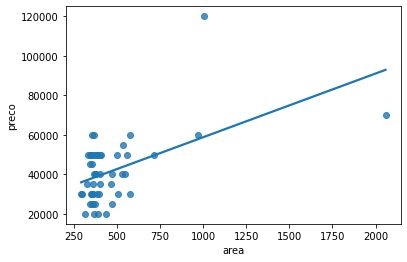

In [19]:
sns.regplot(x = "area", 
            y = "preco",  
            ci = None, 
            data = imovel) 

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


imovel_norm = pd.DataFrame(scaler.fit_transform(imovel), index=imovel.index, columns=imovel.columns)

In [21]:

imovel_norm.head()

,area,preco
0,0.037776,0.05
1,0.033950,0.25
2,0.027585,0.25
3,0.080919,0.00
4,0.027517,0.05


In [22]:
imovel_norm.describe()

,area,preco
count,54.000000,54.000000
mean,0.093101,0.212963
std,0.148229,0.164886
min,0.000000,0.000000
25%,0.035065,0.100000
50%,0.049389,0.200000
75%,0.100245,0.300000
max,1.000000,1.000000


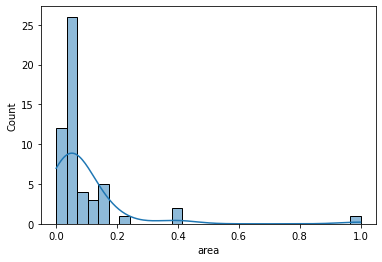

In [23]:
sns.histplot(data=imovel_norm, x="area", kde=True)

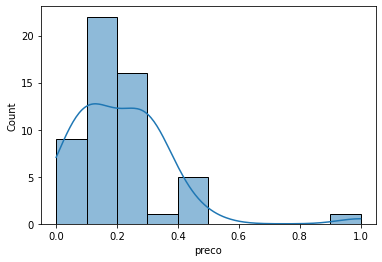

In [24]:
sns.histplot(data=imovel_norm, x="preco", kde=True)

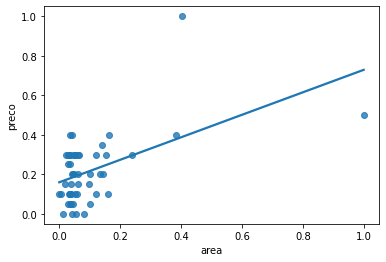

In [25]:
sns.regplot(x = "area", 
            y = "preco",  
            ci = None, 
            data = imovel_norm) 

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


limite_std = pd.DataFrame(scaler.fit_transform(imovel), index=imovel.index, columns=imovel.columns)

In [27]:
limite_std.head()

,area,preco
0,-0.376749,-0.997620
1,-0.402801,0.226732
2,-0.446145,0.226732
3,-0.082956,-1.303707
4,-0.446608,-0.997620


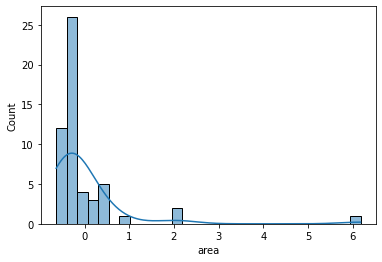

In [28]:
sns.histplot(limite_std, x="area", kde=True)

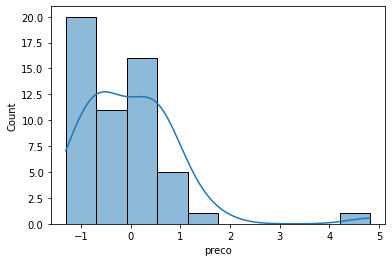

In [29]:
sns.histplot(limite_std, x="preco", kde=True)

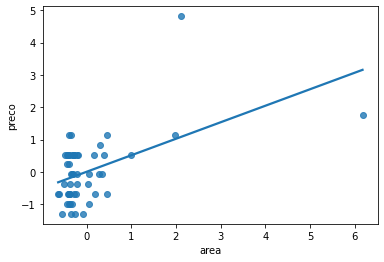

In [30]:
sns.regplot(x = "area", 
            y = "preco",  
            ci = None, 
            data = limite_std) 

In [32]:
import statsmodels.formula.api as smf

In [34]:
#modelo MRLS
function = 'preco~area-1'
model = smf.ols(formula=function, data=limite_std).fit() 
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  preco   R-squared (uncentered):                   0.262
Model:                            OLS   Adj. R-squared (uncentered):              0.248
Method:                 Least Squares   F-statistic:                              18.77
Date:                Tue, 11 Oct 2022   Prob (F-statistic):                    6.61e-05
Time:                        11:15:55   Log-Likelihood:                         -68.438
No. Observations:                  54   AIC:                                      138.9
Df Residuals:                      53   BIC:                                      140.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [35]:
x = limite_std[["area"]]

y = limite_std[["preco"]]

In [36]:
#Separando os dados de Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Criando um Objeto de Regressão Linear
lr = LinearRegression()

#Treinando o Modelo
lr.fit(x_train,y_train)

LinearRegression()

In [37]:
r_sq = lr.score(x, y)
print('Coeficiente de Determinação (R²):', r_sq)

Coeficiente de Determinação (R²): 0.2605855251089534


In [38]:
y_pred_train = lr.predict(x_train)
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

MAE: 0.6779196341565954
MSE: 0.8240992438856338
RMSE: 0.907799120888335


In [39]:
y_pred = lr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.5875238490475696
MSE: 0.40837401427584186
RMSE: 0.639041480872597
